# Comparing Various Regression Algorithms

## Linear Regression

In [1]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Read data from local storage
Data = pd.read_csv('P3\CE802_P3_Data.csv', dayfirst=True)
Data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,Europe,-16720.42,735.74,22.14,15.48,Medium,124.05,...,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,UK,-8070.93,91.35,-1.86,18.60,Very high,57.78,...,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,Europe,-12126.02,145.64,-68.28,14.22,High,-65.88,...,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,Europe,-10050.95,218.39,-40.58,14.99,Very high,132.12,...,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,Rest,-10197.84,-346.17,-47.04,8.92,High,113.31,...,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23


In [3]:
#Explore the data in detail
P3_Data=Data
P3_Data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,Europe,-16720.42,735.74,22.14,15.48,Medium,124.05,...,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,UK,-8070.93,91.35,-1.86,18.60,Very high,57.78,...,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,Europe,-12126.02,145.64,-68.28,14.22,High,-65.88,...,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,Europe,-10050.95,218.39,-40.58,14.99,Very high,132.12,...,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,Rest,-10197.84,-346.17,-47.04,8.92,High,113.31,...,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23


In [4]:
# Detailed study on data types
P3_Data.dtypes

F1        float64
F2        float64
F3          int64
F4         object
F5        float64
F6        float64
F7        float64
F8        float64
F9         object
F10       float64
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17       float64
F18       float64
F19       float64
F20       float64
F21       float64
F22       float64
F23       float64
F24       float64
F25       float64
F26         int64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object

<AxesSubplot:>

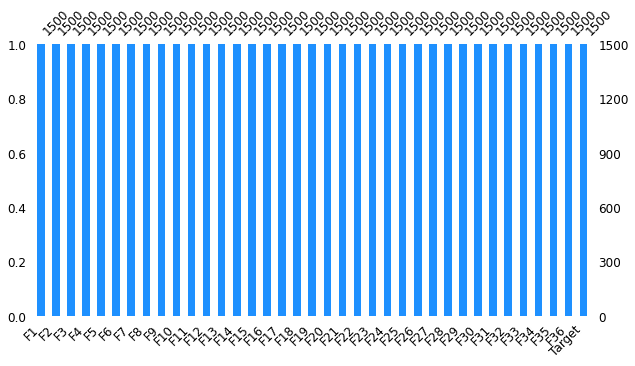

In [5]:
# Visualising data to understand the missing values
import missingno as msno
%matplotlib inline
#msno.heatmap(Data)
msno.bar(P3_Data, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [6]:
#Changing categorical value to numbers through label encoding
cleanup = {"F4": {"Europe":0, "UK":1, "USA":2, "Rest":3}, "F9":{"Very high":1, "High":2, "Medium":3, "Low":4, "Very low":5}}
P3_Data.replace(cleanup, inplace=True)

In [7]:
#extracting dependent and independet features separately for testing and training the data
features = P3_Data.drop('Target', axis=1)
predictor = P3_Data['Target']

In [8]:
#Test train split to apply on various models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, predictor, test_size = 0.33, random_state = 10)

In [9]:
#Make a copy
Linear_X_train=X_train.copy()
Linear_y_train=y_train.copy()
Linear_X_test=X_test.copy()
Linear_y_test=y_test.copy()

In [10]:
#Scaling of input data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Linear_X_train = sc.fit_transform(Linear_X_train)
Linear_X_test = sc.transform(Linear_X_test)

In [11]:
#Applying the linear regression method
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
fitted_lr=reg.fit(Linear_X_train, Linear_y_train.values.ravel())

In [12]:
#Predicting the test and train on the build model
y_train_pred=reg.predict(Linear_X_train)
y_test_pred=reg.predict(Linear_X_test)

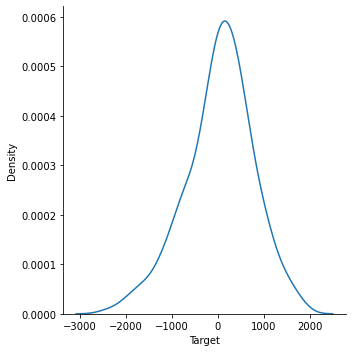

In [13]:
#visualizing prediction as difference of prediction and y_test
#varience in between -10 to +10/ but here its too worst
import seaborn as sns
sns.displot(y_test_pred-Linear_y_test, kind='kde')

In [14]:
#Calculating R2 value
from sklearn.metrics import r2_score 
Linear_score='{:.2%}'.format(r2_score(Linear_y_test, y_test_pred))
print('R2 Score:', Linear_score)

R2 Score: 61.18%


In [15]:
#Calculating mean square error value
from sklearn.metrics import mean_squared_error
mse_error=mean_squared_error(Linear_y_test, y_test_pred)
mse_error

559715.6210432777

In [16]:
#Comparing the test and predicted value
pred_list=pd.DataFrame({'Actual Value':Linear_y_test,'Predicted Value': y_test_pred, 'Difference':Linear_y_test-y_test_pred})
pred_list

,Actual Value,Predicted Value,Difference
633,1172.10,1815.309772,-643.209772
56,1232.01,1306.957707,-74.947707
1245,595.52,900.124576,-304.604576
1306,721.76,505.965438,215.794562
1031,18.86,-782.807727,801.667727
...,...,...,...
679,794.82,1230.731320,-435.911320
1487,3367.71,1694.992808,1672.717192
467,956.04,596.995779,359.044221
1428,3407.15,1613.332677,1793.817323


## Random Forest

In [17]:
#Make a copy
Forest_X_train=X_train.copy()
Forest_y_train=y_train.copy()
Forest_X_test=X_test.copy()
Forest_y_test=y_test.copy()

In [18]:
#Scaling of input data
from sklearn.preprocessing import StandardScaler
sc_forest = StandardScaler()

#Fitting the data
Forest_X_train = sc_forest.fit_transform(Forest_X_train)
Forest_X_test = sc_forest.transform(Forest_X_test)

In [19]:
#Applying Randon Forest method
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_classification
Randomclf = RandomForestRegressor(max_depth=2, random_state=0)
fitted_rf=Randomclf.fit(Forest_X_train, Forest_y_train)

In [20]:
#Predicting the test and train set results
y_train_pred=Randomclf.predict(Forest_X_train)
y_test_pred=Randomclf.predict(Forest_X_test)

In [21]:
#Calculating R2 value
from sklearn.metrics import r2_score 
Forest_r2Score='{:.2%}'.format(r2_score(Forest_y_test, y_test_pred))
print('R2 Score:', Forest_r2Score)

R2 Score: 28.71%


In [22]:
#Calculating mean square error value
from sklearn import metrics
mse_error=metrics.mean_squared_error(Forest_y_test, y_test_pred)
mse_error

1027826.7385293592

## Ridge

In [23]:
#Make a copy
Ridge_X_train=X_train.copy()
Ridge_y_train=y_train.copy()
Ridge_X_test=X_test.copy()
Ridge_y_test=y_test.copy()

In [24]:
#Scaling of input data
from sklearn.preprocessing import StandardScaler
sc_ridge = StandardScaler()
#Fitting the data
Ridge_X_train = sc_ridge.fit_transform(Ridge_X_train)
Ridge_X_test = sc_ridge.transform(Ridge_X_test)

In [25]:
#Applying the Ridge method
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
fitted_rig=ridge.fit(Ridge_X_train,Ridge_y_train)

In [26]:
#Predicting the test and train set results
Ridge_y_pred = ridge.predict(Ridge_X_test)

In [27]:
#Calculating R2 value
#Highest value gives the best model
from sklearn.metrics import r2_score 
Ridge_r2_score='{:.2%}'.format(r2_score(Ridge_y_test, Ridge_y_pred))
print('R2 Score:', Ridge_r2_score)

R2 Score: 61.18%


In [28]:
#Comparing the test and predicted value
#near to 0 means better model with less difference
from sklearn import metrics
mse_error=metrics.mean_squared_error(Ridge_y_test, Ridge_y_pred)
mse_error

559631.0596058896

In [29]:
#Displaying the score in one place for easy comparison
print('Linear Regression train score %.4f, linear test score: %.4f' % (
fitted_lr.score(Linear_X_train,Linear_y_train),
fitted_lr.score(Linear_X_test, Linear_y_test)))
print('Random Forest train score %.4f, Random test score: %.4f' % (
fitted_rf.score(Forest_X_train,Forest_y_train),
fitted_rf.score(Forest_X_test, Forest_y_test)))
print('Ridge train score %.4f, Ridge test score: %.4f' % (
fitted_rig.score(Ridge_X_train,Ridge_y_train),
fitted_rig.score(Ridge_X_test, Ridge_y_test)))

Linear Regression train score 0.6531, linear test score: 0.6118
Random Forest train score 0.3672, Random test score: 0.2871
Ridge train score 0.6531, Ridge test score: 0.6118


Text(0.5, 1.0, 'Actual vs Predicted')

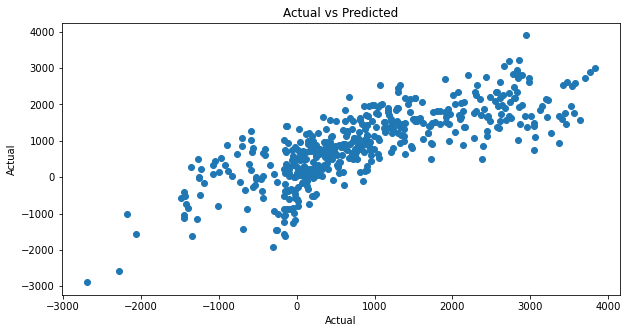

In [30]:
#Visualising actual vs predicted data to study the eveness in the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(Ridge_y_test, Ridge_y_pred)
plt.xlabel('Actual')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

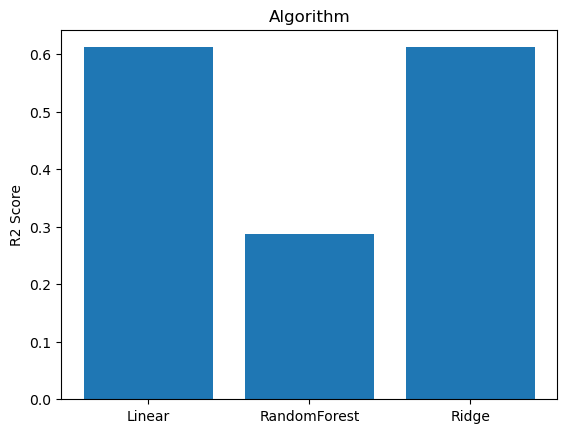

In [31]:
#Comparison of R2 in various implemented algorithms
import matplotlib.pyplot as plt; plt.rcdefaults()
objects = ('Linear', 'RandomForest', 'Ridge')
y_pos = np.arange(len(objects))
performance = [0.6118,0.2870,0.6118]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('R2 Score')
plt.title('Algorithm')
plt.show()

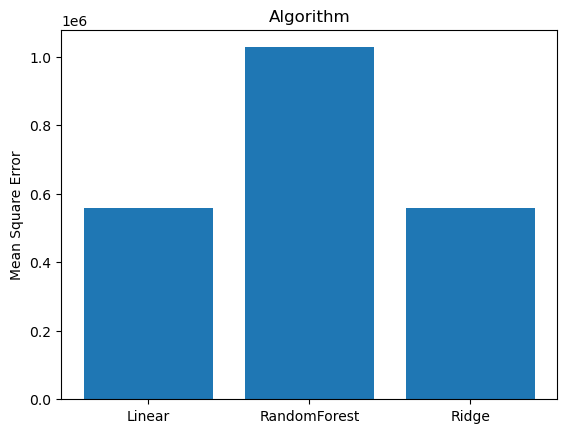

In [32]:
#Comparison of mean square error in various implemented algorithms
import matplotlib.pyplot as plt; plt.rcdefaults()
objects = ('Linear', 'RandomForest', 'Ridge')
y_pos = np.arange(len(objects))
performance = [559715.62,1027956.44,559704.59]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Square Error')
plt.title('Algorithm')
plt.show()

# PART B

In [33]:
# Load the test data
test_df = pd.read_csv('P3\CE802_P3_Test.csv')
P3_Test=test_df

In [34]:
P3_Test = test_df.iloc[:,:-1].copy()

In [35]:
#Changing categorical value to numbers
cleanup = {"F4": {"Europe":0, "UK":1, "USA":2, "Rest":3}, "F9":{"Very high":1, "High":2, "Medium":3, "Low":4, "Very low":5}}
P3_Test.replace(cleanup, inplace=True)

In [36]:
#Scaling and data transformation
test_data=sc_ridge.transform(P3_Test)

In [37]:
y_pred = ridge.predict(test_data)

In [38]:
# Replace the last (empty) column with your prediction in the orginal data frame
test_df.iloc[:,-1] = y_pred

In [39]:
# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

In [40]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P3\CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])